# THIS CODE IS JUST FOR REFERENCE. TURN IN THE NOTEBOOK TO GET CREDIT.


## Assignment Objectives

By the end of this practical lab you will be able to:

* Manipulate and re-code date and time stamps
* Create summary graphics showing the temporal attributes of point data
* Map point data using bins and density plots

## Visualizing Points
We will first read some crime data into R for the [City of Chicago, USA](https://data.cityofchicago.org/view/5cd6-ry5g). This contains those crimes which occurred during the year 2016 as of 24th December; with the attributes including the category of the crime and a variety of other information such as location and date / time. The following code imports the data, parses the date and time stamp using the base R function strptime() and also ymd_hms() from the package lubridate. We then remove unwanted columns and restrict the results to those coded as "BURGLARY".

In [1]:
install.packages("lubridate")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [14]:
library(lubridate)
base::date()

[1] "Thu Oct  3 00:50:28 2024"

# Import Crimes
crimes <- read.csv("./data/chicago_crimes_2016.csv")

#Parse date & time
crimes$New_Date <- ymd_hms((strptime(crimes$Date, "%m/%d/%Y %I:%M:%S %p",tz="UTC")))

#Subset the data to remove unwanted colums
crimes <- crimes[crimes$Primary.Type == "BURGLARY",c("ID","Latitude","Longitude","New_Date")]

# Remove crimes with no lat / lon
crimes <- crimes[!is.na(crimes$Latitude),]

#View the top of the data
head(crimes)
```

We can then see how the burglaries are distributed by day of the week. We use the wday() function to convert the date column into days - by adding "label = TRUE" this returns a text string relating to the day of the week (e.g. "Mon"):
```{r message=FALSE, warning=FALSE}
library(ggplot2)
```

In [31]:
library(lubridate)

# Load the dataset
crimes <- read.csv("./data/chicago_crimes_2016.csv")

# Convert the Date column to New_Date with proper format using lubridate
crimes$New_Date <- mdy_hms(crimes$Date, tz = "UTC")

# Filter the data for BURGLARY and select relevant columns
crimes <- crimes[crimes$Primary.Type == "BURGLARY", c("ID", "Latitude", "Longitude", "New_Date")]

# Remove rows with missing Latitude values
crimes <- crimes[!is.na(crimes$Latitude), ]

# Display the first few rows
head(crimes)

ID       Latitude Longitude New_Date           
24  10446386 41.93145 -87.75284 2016-03-13 04:25:00
27  10446394 41.74114 -87.57458 2016-03-13 05:30:00
103 10446948 41.73346 -87.65813 2016-03-13 09:00:00
117 10448234 41.77770 -87.61315 2016-03-13 09:00:00
124 10449036 41.98388 -87.65278 2016-03-13 09:00:00
143 10465522 41.77596 -87.60339 2016-03-28 09:00:00

In [24]:
library(ggplot2)

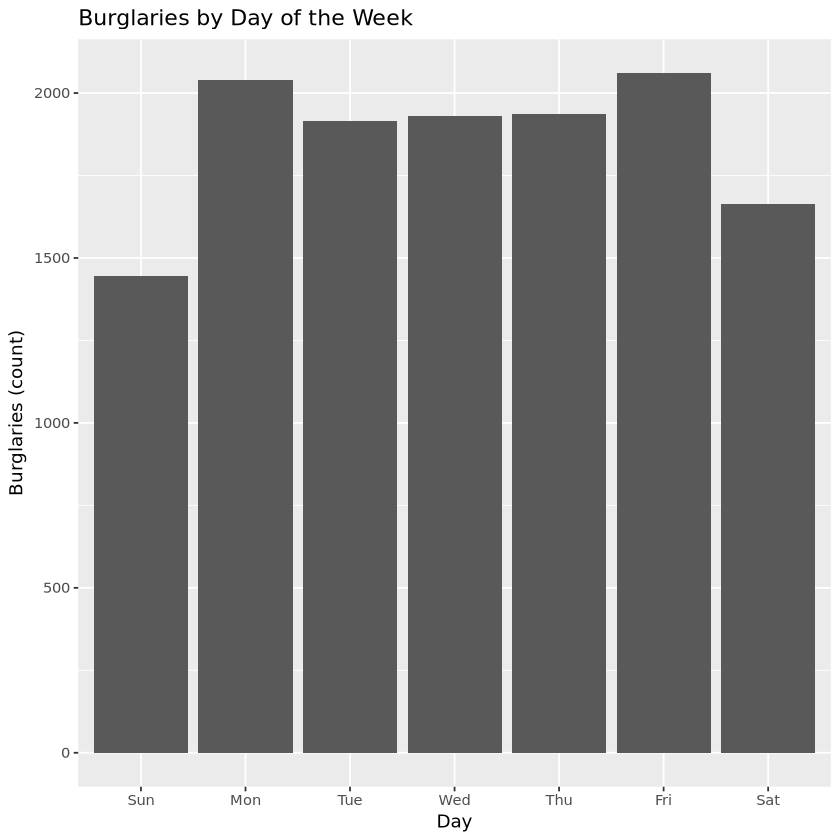

In [35]:
# Create a new column 'Day' for the day of the week
crimes$Day <- wday(crimes$New_Date, label = TRUE)

# Plot the data using the new 'Day' column
ggplot(data = crimes, aes(x = Day)) +
    geom_bar() +
    xlab("Day") + 
    ylab("Burglaries (count)") +
    ggtitle("Burglaries by Day of the Week")

Warning message:
“Use of `crimes$New_Date` is discouraged.
ℹ Use `New_Date` instead.”


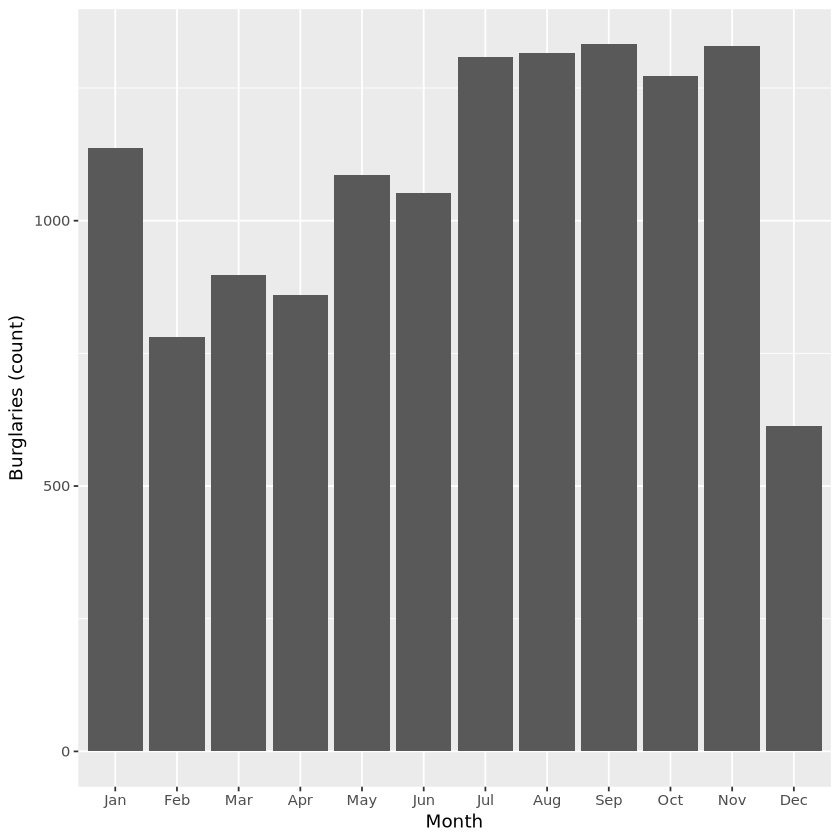

In [36]:
ggplot(data=crimes, aes(month(crimes$New_Date,label = TRUE))) +
    geom_bar() +
    xlab("Month") + 
    ylab("Burglaries (count)")

We can see that in 2016 there were more recorded burglary incidences during the week. We can also look at changes month, however, this time using the month() function:

So far we have displayed months and days separately, however, we can also use the facet_grid option to produce separate plots for each month; and additionally add an aesthetic to the geom_bar that colors each day differently.

Warning message:
“Use of `crimes$New_Date` is discouraged.
ℹ Use `New_Date` instead.”
Warning message:
“Use of `crimes$New_Date` is discouraged.
ℹ Use `New_Date` instead.”


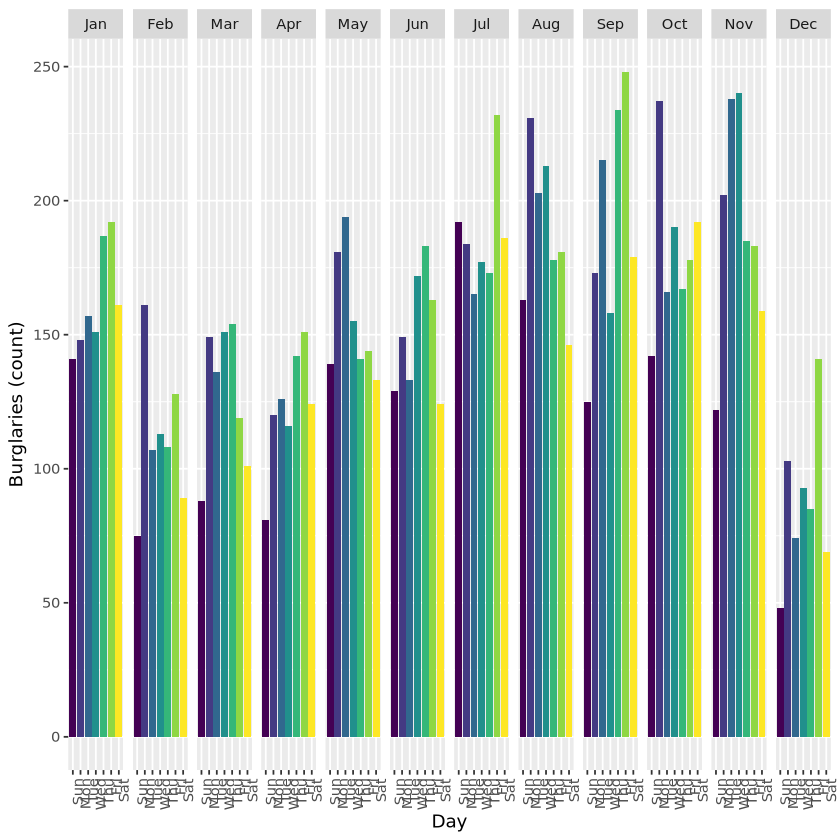

In [37]:
ggplot(data=crimes, aes(wday(crimes$New_Date,label = TRUE))) +
    geom_bar(aes(,fill=wday(crimes$New_Date,label = TRUE))) +
    xlab("Day") + 
    ylab("Burglaries (count)") +
    facet_grid(~month(crimes$New_Date,label = TRUE)) +
    theme(axis.text.x = element_text(angle = 90, hjust = 1),legend.position="none")

Using a similar technique we can also explore the time of the day during which burglaries have been recorded as having occurred and then view by quarter. When interpreting these data it is worth thinking about potential bias within the crime data - for example, why are so many burglaries recorded as having taken place first thing in the morning?

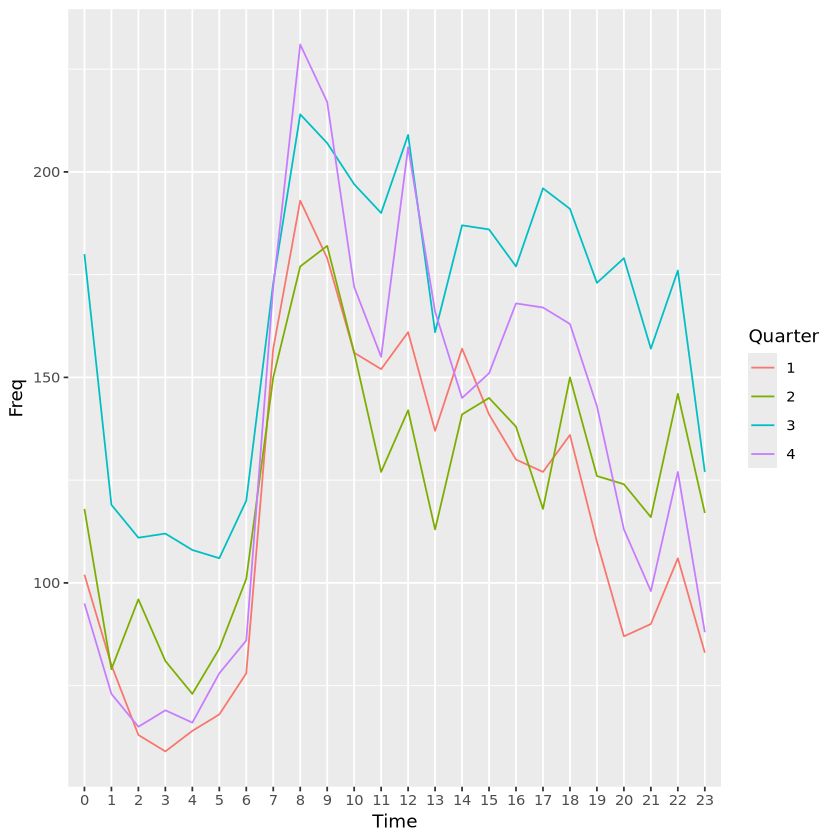

In [38]:
#Create a summary data frame of the counts of burglaries by hour time band and quarter of the year
t <- data.frame(table(hour(crimes$New_Date),quarter(crimes$New_Date)))

colnames(t) <- c("Time","Quarter","Freq") # Name columns as something sensible

#Create plot
p <- ggplot(t, aes(x=Time, y=Freq, group=Quarter, colour = Quarter))
p + geom_line()


As we showed in the previous practical (6. Data Viz 2 - Mapping Areas and Context), we can map points using ggmap - as a representation this is however not that useful and doesn't give a clear picture of the distribution of burglaries:

In [40]:
install.packages("ggmap")

also installing the dependencies ‘jpeg’, ‘bitops’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [4]:
install.packages("leaflet")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [6]:
# Load the dataset (update with your correct file path if necessary)
crimes <- read.csv("./data/chicago_crimes_2016.csv")

# Convert the Date column to New_Date with proper format
library(lubridate)
crimes$New_Date <- ymd_hms(strptime(crimes$Date, "%m/%d/%Y %I:%M:%S %p", tz = "UTC"))

# Filter the data for BURGLARY and select relevant columns
crimes <- crimes[crimes$Primary.Type == "BURGLARY", c("ID", "Latitude", "Longitude", "New_Date")]

# Remove rows with missing Latitude and Longitude values
crimes <- crimes[!is.na(crimes$Latitude) & !is.na(crimes$Longitude),]

# Check the first few rows of the processed dataset
head(crimes)



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


Warning message:
“ 2712 failed to parse.”


ID       Latitude Longitude New_Date           
24  10446386 41.93145 -87.75284 2016-03-13 04:25:00
27  10446394 41.74114 -87.57458 2016-03-13 05:30:00
103 10446948 41.73346 -87.65813 2016-03-13 09:00:00
117 10448234 41.77770 -87.61315 2016-03-13 09:00:00
124 10449036 41.98388 -87.65278 2016-03-13 09:00:00
143 10465522 41.77596 -87.60339 2016-03-28 09:00:00

Warning message:
“ 2712 failed to parse.”


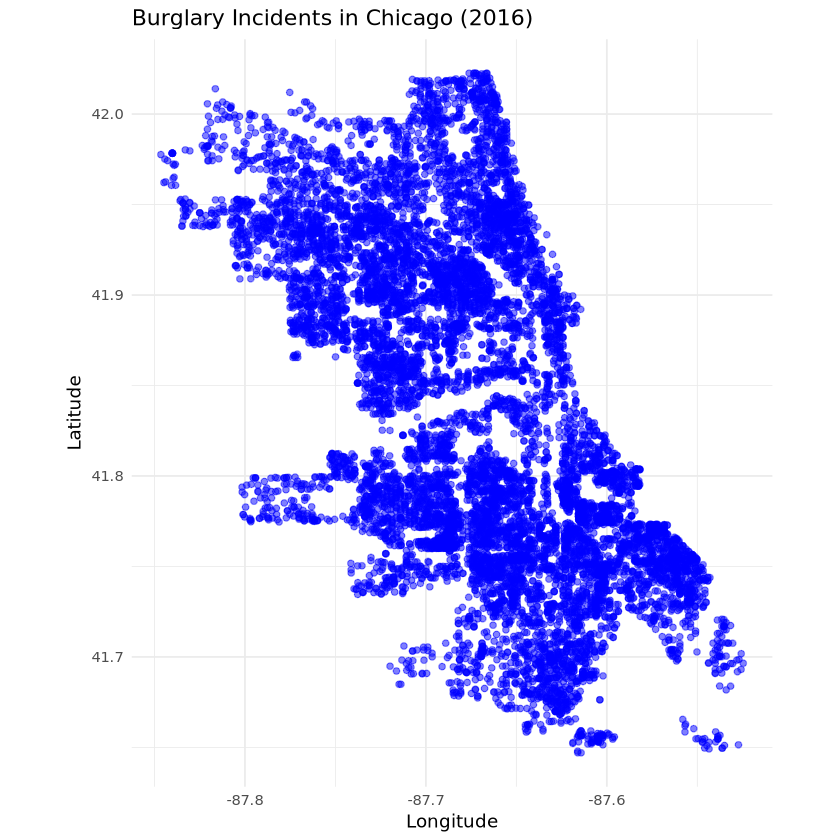

In [13]:
# Load required libraries
library(ggplot2)
library(maps)
library(dplyr)

# Load the dataset (update with your correct file path if necessary)
crimes <- read.csv("./data/chicago_crimes_2016.csv")

# Convert the Date column to New_Date with proper format
library(lubridate)
crimes$New_Date <- ymd_hms(strptime(crimes$Date, "%m/%d/%Y %I:%M:%S %p", tz = "UTC"))

# Filter the data for BURGLARY and select relevant columns
crimes <- crimes %>% 
  filter(Primary.Type == "BURGLARY") %>%
  select(ID, Latitude, Longitude, New_Date)

# Remove rows with missing Latitude and Longitude values
crimes <- crimes %>% 
  filter(!is.na(Latitude) & !is.na(Longitude))

# Get a base map of Chicago
chicago_map <- map_data("county") %>% 
  filter(region == "cook") # Filtering for Cook County, where Chicago is located

# Plot the map with the burglary data
ggplot() +
  geom_polygon(data = chicago_map, aes(x = long, y = lat, group = group), fill = "lightgray") +
  geom_point(data = crimes, aes(x = Longitude, y = Latitude), alpha = 0.5, color = "blue") +
  coord_fixed() +
  labs(title = "Burglary Incidents in Chicago (2016)",
       x = "Longitude",
       y = "Latitude") +
  theme_minimal()


In [7]:
library(leaflet)

# Create a leaflet map centered on Chicago
leaflet(data = crimes) %>%
    addTiles() %>%  # Use OpenStreetMap tiles
    addCircleMarkers(~Longitude, ~Latitude, radius = 2, 
                     popup = ~paste("Crime ID:", ID),
                     label = ~paste("Date:", New_Date)) %>%
    setView(lng = -87.65, lat = 41.85, zoom = 11)


HTML widgets cannot be represented in plain text (need html)

In [41]:
library(ggmap)

ℹ Google's Terms of Service: <https://mapsplatform.google.com>
  Stadia Maps' Terms of Service: <https://stadiamaps.com/terms-of-service/>
  OpenStreetMap's Tile Usage Policy: <https://operations.osmfoundation.org/policies/tiles/>
ℹ Please cite ggmap if you use it! Use `citation("ggmap")` for details.


In [3]:
library(ggmap)

# Get a background map for Chicago using OpenStreetMap (no API key required)
chicago <- get_map(location = c(lon = -87.65, lat = 41.85), zoom = 11, source = "osm")

# Basic point plot
ggmap(chicago) + 
    geom_point(data = crimes, aes(x = Longitude, y = Latitude))

ERROR: [1m[33mError[39m in `get_googlemap()`:[22m
[1m[22m[33m![39m Google now requires an API key; see `ggmap::register_google()`.


We can improve this a bit by shrinking the point size and using transparency, however, this still isn't great as the point density is too high:


In [8]:
library(leaflet)

# Create a leaflet map centered on Chicago with reduced point size and increased transparency
leaflet(data = crimes) %>%
    addTiles() %>%  # Use OpenStreetMap tiles
    addCircleMarkers(~Longitude, ~Latitude, radius = 1.5,  # Adjust size
                     color = "blue", fillOpacity = 0.1,   # Adjust transparency
                     popup = ~paste("Crime ID:", ID),
                     label = ~paste("Date:", New_Date)) %>%
    setView(lng = -87.65, lat = 41.85, zoom = 11)


HTML widgets cannot be represented in plain text (need html)

We showed in a previous lab that one way in which we can manage point data is to aggregate these up into a given zonal geography (see lab 2. Data Manipulation in R); however, this assumes that the data being observed have a [logical bounding geography](https://en.wikipedia.org/wiki/Modifiable_areal_unit_problem). When this is not the case it may be effective to spatially bin the data into a set of uniform and discrete zones. It is common for these visualizations to use either grids (squares) or hexagons; however, as with other formal zonal definitions (e.g. blocks / census tracts etc), the choice of grid or hex size may impact the patterns shown.

We can create a gridded map using the stat_bin2d function - the size of the grid is adjusted with the bins size, and creates an aggregated count within each cell:

Higher numbers create a smaller grid size:

In [ ]:
ggmap(chicago, base_layer = ggplot(crimes, aes(x=Longitude, y=Latitude))) +
stat_bin2d(bins = 50)

A similar representation can be made created with hexagons instead of squares, however, we need a number of additional parameters that prevent the output map being distorted. First we plot without these:


In [ ]:
ggmap(chicago, base_layer = ggplot(crimes, aes(x=Longitude, y=Latitude))) +
coord_cartesian() +
stat_binhex(bins=50)

Warning message:
“ 2712 failed to parse.”


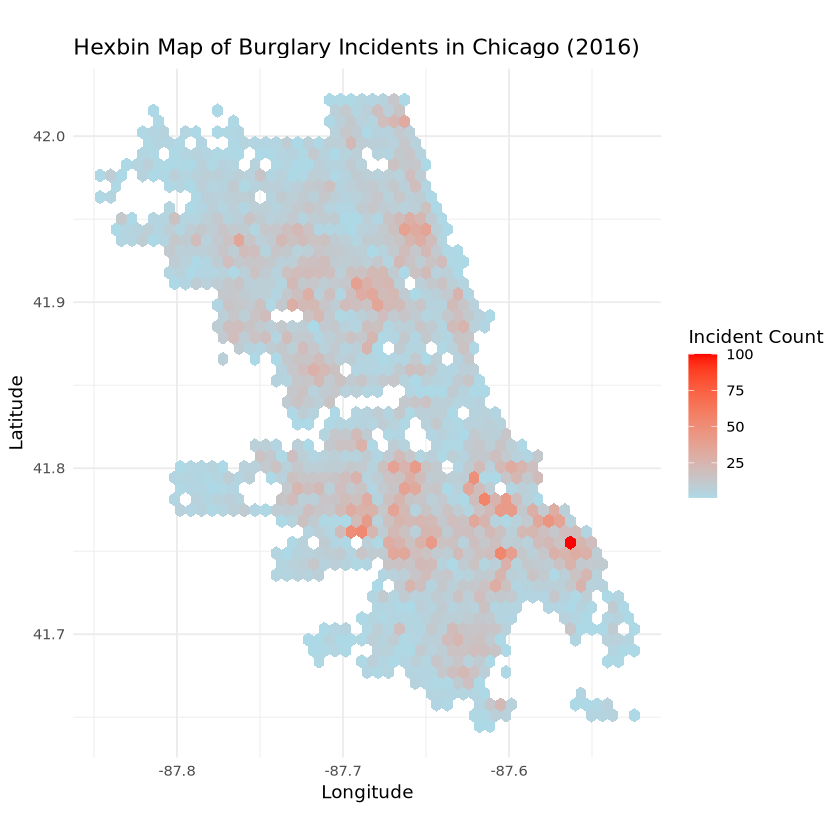

In [14]:
# Load required libraries
library(ggplot2)
library(maps)
library(dplyr)

# Load the dataset (update with your correct file path if necessary)
crimes <- read.csv("./data/chicago_crimes_2016.csv")

# Convert the Date column to New_Date with proper format
library(lubridate)
crimes$New_Date <- ymd_hms(strptime(crimes$Date, "%m/%d/%Y %I:%M:%S %p", tz = "UTC"))

# Filter the data for BURGLARY and select relevant columns
crimes <- crimes %>% 
  filter(Primary.Type == "BURGLARY") %>%
  select(ID, Latitude, Longitude, New_Date)

# Remove rows with missing Latitude and Longitude values
crimes <- crimes %>% 
  filter(!is.na(Latitude) & !is.na(Longitude))

# Get a base map of Chicago
chicago_map <- map_data("county") %>% 
  filter(region == "cook") # Filtering for Cook County, where Chicago is located

# Plot the hexbin map
ggplot() +
  geom_polygon(data = chicago_map, aes(x = long, y = lat, group = group), fill = "lightgray") +
  geom_hex(data = crimes, aes(x = Longitude, y = Latitude), bins = 50) +
  coord_fixed() +
  scale_fill_gradient(low = "lightblue", high = "red", name = "Incident Count") +
  labs(title = "Hexbin Map of Burglary Incidents in Chicago (2016)",
       x = "Longitude",
       y = "Latitude") +
  theme_minimal()


And then we plot with the adjustment which prevents the stretching of the x axis

In [ ]:
ggmap(chicago, base_layer = ggplot(crimes, aes(x=Longitude, y=Latitude))) +
coord_cartesian(xlim = c(-87.84918,-87.3)) +
stat_binhex(bins=50)

Warning message:
“ 2712 failed to parse.”


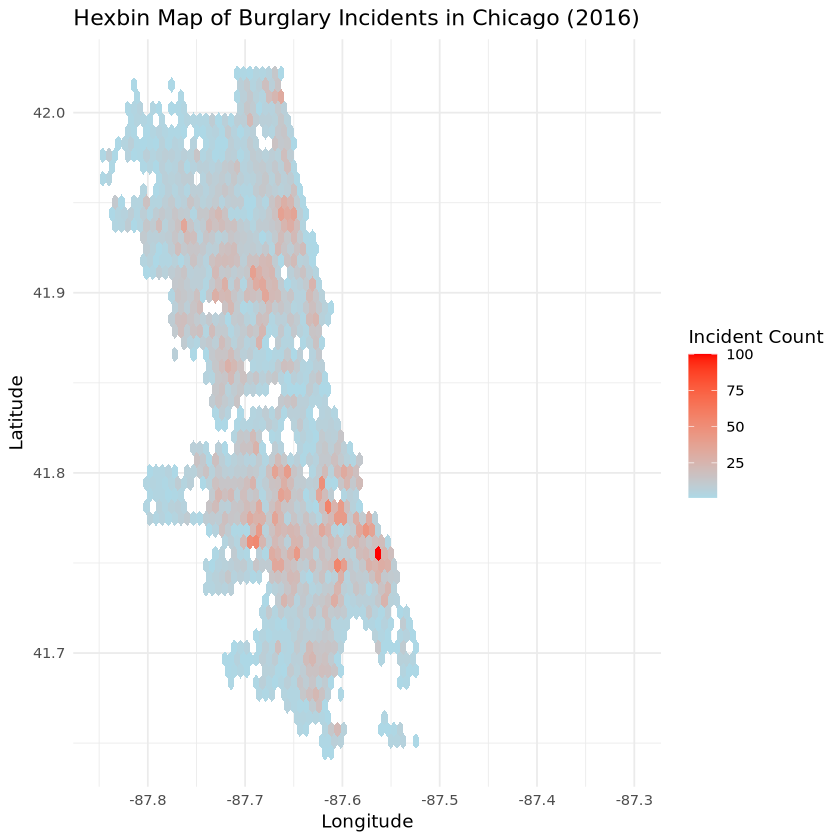

In [15]:
# Load required libraries
library(ggplot2)
library(maps)
library(dplyr)

# Load the dataset (update with your correct file path if necessary)
crimes <- read.csv("./data/chicago_crimes_2016.csv")

# Convert the Date column to New_Date with proper format
library(lubridate)
crimes$New_Date <- ymd_hms(strptime(crimes$Date, "%m/%d/%Y %I:%M:%S %p", tz = "UTC"))

# Filter the data for BURGLARY and select relevant columns
crimes <- crimes %>% 
  filter(Primary.Type == "BURGLARY") %>%
  select(ID, Latitude, Longitude, New_Date)

# Remove rows with missing Latitude and Longitude values
crimes <- crimes %>% 
  filter(!is.na(Latitude) & !is.na(Longitude))

# Get a base map of Chicago
chicago_map <- map_data("county") %>% 
  filter(region == "cook") # Filtering for Cook County, where Chicago is located

# Plot the hexbin map with specified longitude limits
ggplot() +
  geom_polygon(data = chicago_map, aes(x = long, y = lat, group = group), fill = "lightgray") +
  geom_hex(data = crimes, aes(x = Longitude, y = Latitude), bins = 50) +
  coord_cartesian(xlim = c(-87.84918, -87.3)) +  # Set x-axis limits
  scale_fill_gradient(low = "lightblue", high = "red", name = "Incident Count") +
  labs(title = "Hexbin Map of Burglary Incidents in Chicago (2016)",
       x = "Longitude",
       y = "Latitude") +
  theme_minimal()


We can then tidy the map up further, and in particular, remove the grey area and axis content from the display:


In [ ]:
ggmap(chicago, base_layer = ggplot(crimes, aes(x=Longitude, y=Latitude))) +
coord_cartesian(xlim = c(-87.84918,-87.3)) +
stat_binhex(bins=50) + 
theme_bw() +
theme(axis.line = element_blank(),
      axis.text = element_blank(),
      axis.title=element_blank(),
      axis.ticks = element_blank(),
      legend.key = element_blank(),
      panel.grid.major = element_blank(),
      panel.grid.minor = element_blank(),
      panel.border = element_blank(),
      panel.background = element_blank())

Warning message:
“ 2712 failed to parse.”


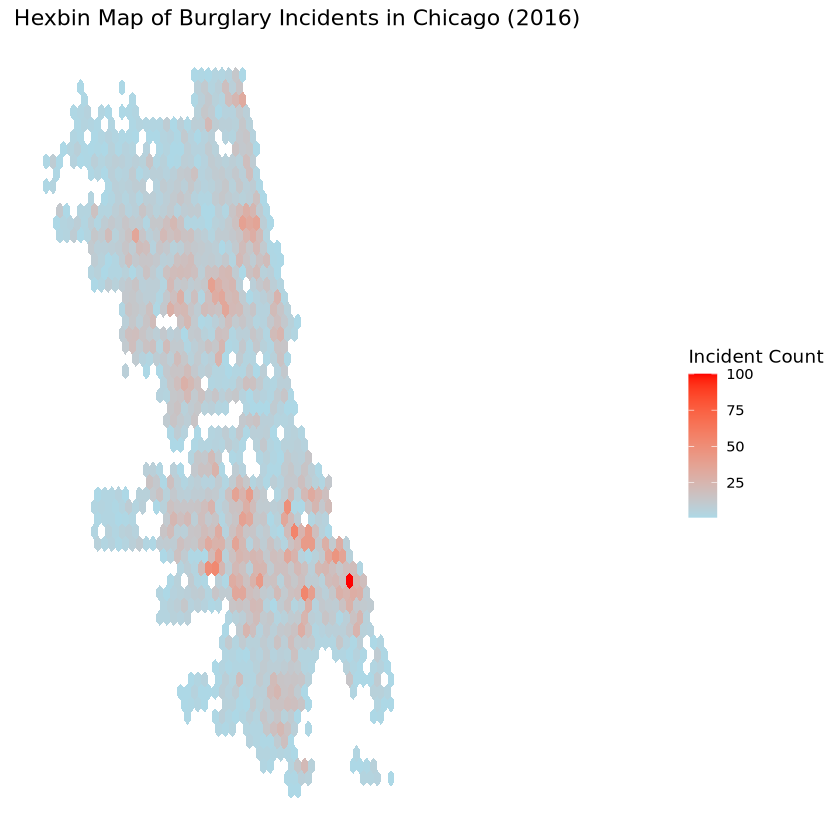

In [16]:
# Load required libraries
library(ggplot2)
library(maps)
library(dplyr)

# Load the dataset (update with your correct file path if necessary)
crimes <- read.csv("./data/chicago_crimes_2016.csv")

# Convert the Date column to New_Date with proper format
library(lubridate)
crimes$New_Date <- ymd_hms(strptime(crimes$Date, "%m/%d/%Y %I:%M:%S %p", tz = "UTC"))

# Filter the data for BURGLARY and select relevant columns
crimes <- crimes %>% 
  filter(Primary.Type == "BURGLARY") %>%
  select(ID, Latitude, Longitude, New_Date)

# Remove rows with missing Latitude and Longitude values
crimes <- crimes %>% 
  filter(!is.na(Latitude) & !is.na(Longitude))

# Get a base map of Chicago
chicago_map <- map_data("county") %>% 
  filter(region == "cook") # Filtering for Cook County, where Chicago is located

# Plot the hexbin map with specified longitude limits and custom theme
ggplot() +
  geom_polygon(data = chicago_map, aes(x = long, y = lat, group = group), fill = "lightgray") +
  geom_hex(data = crimes, aes(x = Longitude, y = Latitude), bins = 50) +
  coord_cartesian(xlim = c(-87.84918, -87.3)) +  # Set x-axis limits
  scale_fill_gradient(low = "lightblue", high = "red", name = "Incident Count") +
  labs(title = "Hexbin Map of Burglary Incidents in Chicago (2016)",
       x = "Longitude",
       y = "Latitude") +
  theme_bw() +  # Use a black-and-white theme
  theme(axis.line = element_blank(),
        axis.text = element_blank(),
        axis.title = element_blank(),
        axis.ticks = element_blank(),
        legend.key = element_blank(),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        panel.border = element_blank(),
        panel.background = element_blank())


An alternative to aggregating points into zones of different types is to calculate a [density surface](http://www.spatialanalysisonline.com/HTML/index.html?density__kernels_and_occupancy.htm). This is implemented within ggmap through the stat_density2d function. The granularity of the surface is controlled with the bins argument. The legend displays both the alpha and the color choices because the "fill = ..level..,alpha=..level.." options are set; the "..level.." is an internal variable that refers to the number of bins chosen. We will suppress the alpha (bottom) legend item in the next plot.


In [ ]:
ggmap(chicago, base_layer = ggplot(crimes)) +
  stat_density2d(aes(x = Longitude, y = Latitude,fill = ..level..,alpha=..level..), bins = 10, geom = "polygon", data = crimes) +
  scale_fill_gradient(low = "black", high = "red")

Warning message:
“ 2712 failed to parse.”
Warning message:
“The dot-dot notation (`..level..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(level)` instead.”


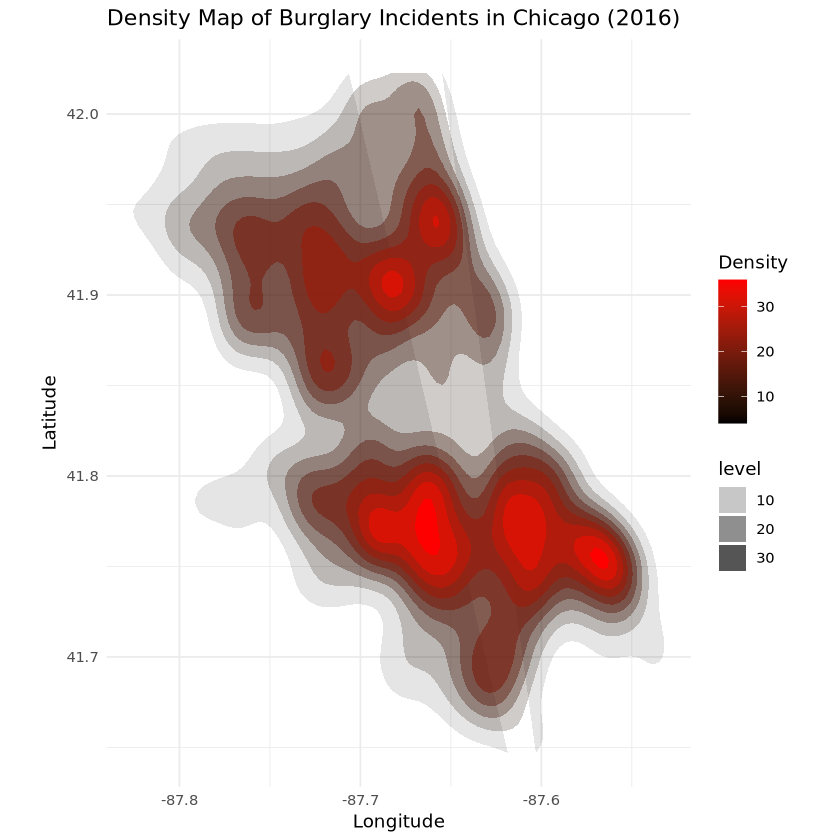

In [17]:
# Load required libraries
library(ggplot2)
library(maps)
library(dplyr)

# Load the dataset (update with your correct file path if necessary)
crimes <- read.csv("./data/chicago_crimes_2016.csv")

# Convert the Date column to New_Date with proper format
library(lubridate)
crimes$New_Date <- ymd_hms(strptime(crimes$Date, "%m/%d/%Y %I:%M:%S %p", tz = "UTC"))

# Filter the data for BURGLARY and select relevant columns
crimes <- crimes %>% 
  filter(Primary.Type == "BURGLARY") %>%
  select(ID, Latitude, Longitude, New_Date)

# Remove rows with missing Latitude and Longitude values
crimes <- crimes %>% 
  filter(!is.na(Latitude) & !is.na(Longitude))

# Get a base map of Chicago
chicago_map <- map_data("county") %>% 
  filter(region == "cook") # Filtering for Cook County, where Chicago is located

# Plot the density map
ggplot() +
  geom_polygon(data = chicago_map, aes(x = long, y = lat, group = group), fill = "lightgray") +
  stat_density2d(aes(x = Longitude, y = Latitude, fill = ..level.., alpha = ..level..), 
                 bins = 10, 
                 geom = "polygon", 
                 data = crimes) +
  scale_fill_gradient(low = "black", high = "red", name = "Density") +
  coord_fixed() +
  labs(title = "Density Map of Burglary Incidents in Chicago (2016)",
       x = "Longitude",
       y = "Latitude") +
  theme_minimal() +
  theme(legend.position = "right")


We can extend the previous plot to add facets for two newly created variables, plus additionally remove some of the unwanted features of the previous map. First create two new columns that record the quarter and day of the week in which the burglary was recorded.

In [18]:
#Append a quarter variable to the crimes data frame
crimes$Q <- quarter(crimes$New_Date)
#Append a day variable to the crimes data frame
crimes$D <- wday(crimes$New_Date,label = TRUE)

Create a plot for quarters:

In [ ]:
# Create a plot
ggmap(chicago, base_layer = ggplot(crimes)) +
  stat_density2d(aes(x = Longitude, y = Latitude,fill = ..level..,alpha=..level..), bins = 10, geom = "polygon", data = crimes) +
  scale_fill_gradient(low = "black", high = "red") +
  facet_wrap(~ Q) +
  guides(alpha=FALSE) +
  theme_bw() +
theme(axis.line = element_blank(),
      axis.text = element_blank(),
      axis.title=element_blank(),
      axis.ticks = element_blank(),
      legend.key = element_blank(),
      panel.grid.major = element_blank(),
      panel.grid.minor = element_blank(),
      panel.border = element_blank(),
      panel.background = element_blank())

Warning message:
“ 2712 failed to parse.”
Warning message:
“The `<scale>` argument of `guides()` cannot be `FALSE`. Use "none" instead as
of ggplot2 3.3.4.”


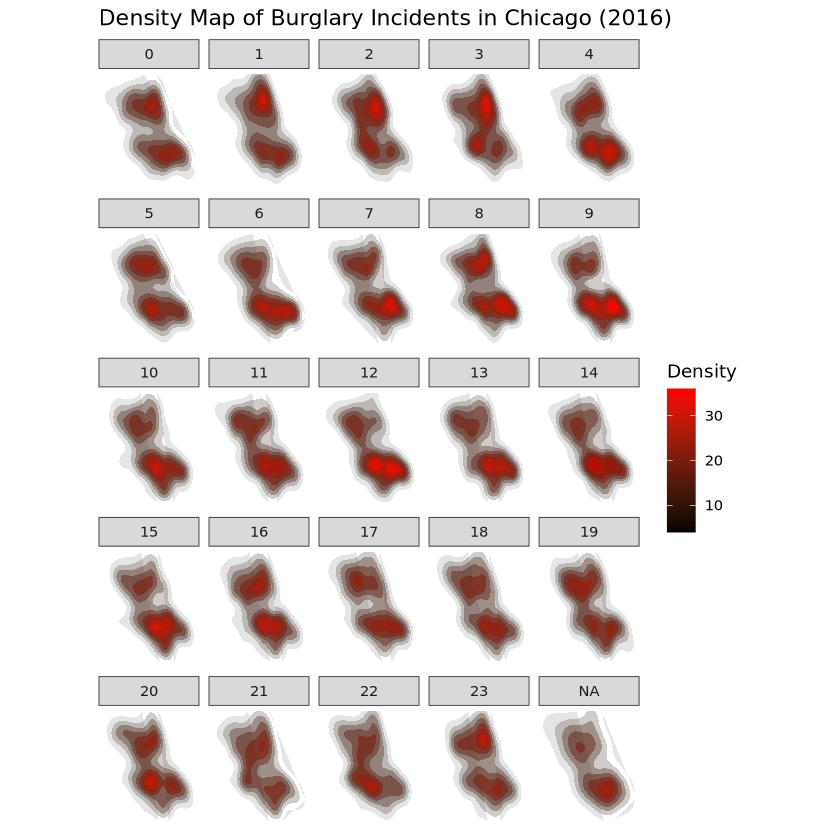

In [20]:
# Load required libraries
library(ggplot2)
library(maps)
library(dplyr)
library(lubridate)

# Load the dataset (update with your correct file path if necessary)
crimes <- read.csv("./data/chicago_crimes_2016.csv")

# Convert the Date column to New_Date with proper format
crimes$New_Date <- ymd_hms(strptime(crimes$Date, "%m/%d/%Y %I:%M:%S %p", tz = "UTC"))

# Filter the data for BURGLARY and select relevant columns
crimes <- crimes %>% 
  filter(Primary.Type == "BURGLARY") %>%
  select(ID, Latitude, Longitude, New_Date)

# Remove rows with missing Latitude and Longitude values
crimes <- crimes %>% 
  filter(!is.na(Latitude) & !is.na(Longitude))

# Add a Q variable for faceting based on hour of the day
crimes$Q <- factor(hour(crimes$New_Date))  # Ensure Q is a factor

# Get a base map of Chicago
chicago_map <- map_data("county") %>% 
  filter(region == "cook")  # Filtering for Cook County, where Chicago is located

# Check if there are enough rows to plot
if(nrow(crimes) > 0) {
  # Create a density plot with facets
  ggplot() +
    geom_polygon(data = chicago_map, aes(x = long, y = lat, group = group), fill = "lightgray") +
    stat_density2d(aes(x = Longitude, y = Latitude, fill = ..level.., alpha = ..level..), 
                   bins = 10, 
                   geom = "polygon", 
                   data = crimes) +
    scale_fill_gradient(low = "black", high = "red", name = "Density") +
    facet_wrap(~ Q) +  # Facet by variable Q
    guides(alpha = FALSE) +  # Remove the alpha guide
    coord_fixed() +
    labs(title = "Density Map of Burglary Incidents in Chicago (2016)",
         x = "Longitude",
         y = "Latitude") +
    theme_bw() +  # Use a black-and-white theme
    theme(axis.line = element_blank(),
          axis.text = element_blank(),
          axis.title = element_blank(),
          axis.ticks = element_blank(),
          legend.key = element_blank(),
          panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          panel.border = element_blank(),
          panel.background = element_blank())
} else {
  print("No data available to plot.")
}



Create a plot for days:

In [ ]:
# Create a plot
ggmap(chicago, base_layer = ggplot(crimes)) +
  stat_density2d(aes(x = Longitude, y = Latitude,fill = ..level..,alpha=..level..), bins = 10, geom = "polygon", data = crimes) +
  scale_fill_gradient(low = "black", high = "red") +
  facet_wrap(~ D) +
  guides(alpha=FALSE) +
  theme_bw() +
theme(axis.line = element_blank(),
      axis.text = element_blank(),
      axis.title=element_blank(),
      axis.ticks = element_blank(),
      legend.key = element_blank(),
      panel.grid.major = element_blank(),
      panel.grid.minor = element_blank(),
      panel.border = element_blank(),
      panel.background = element_blank())

Warning message:
“Removed 13024 rows containing non-finite outside the scale range
(`stat_density2d()`).”
Warning message:
“Computation failed in `stat_density2d()`.
Caused by error in `if (any(h <= 0)) ...`:
! missing value where TRUE/FALSE needed”
Warning message:
“Removed 13024 rows containing missing values or values outside the scale range
(`geom_point()`).”


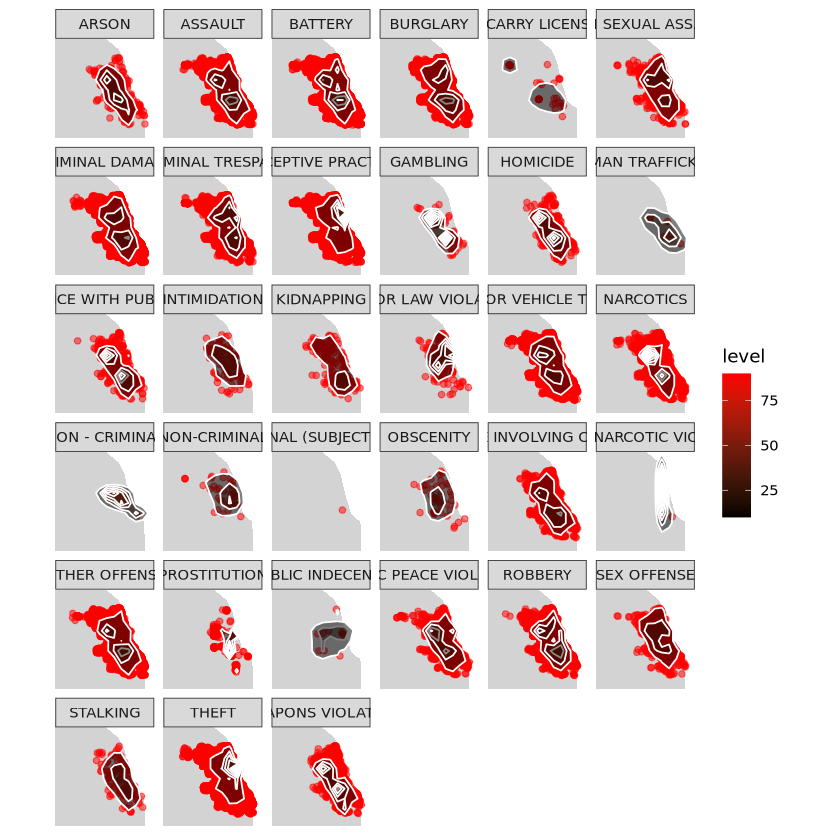

In [25]:
# Load map data for Illinois
il_map <- map_data("state", "illinois")

# Create a plot using ggplot2
ggplot() +
  geom_polygon(data = il_map, aes(x = long, y = lat, group = group), fill = "lightgrey") +
  geom_point(data = crimes, aes(x = Longitude, y = Latitude), color = "red", alpha = 0.5) +
  stat_density2d(data = crimes, aes(x = Longitude, y = Latitude, fill = ..level..), 
                 geom = "polygon", color = "white", alpha = 0.5) +
  scale_fill_gradient(low = "black", high = "red") +
  facet_wrap(~ Primary.Type) +
  coord_fixed(xlim = c(-88.0, -87.5), ylim = c(41.6, 42.1)) +  # Adjust limits for Chicago
  theme_bw() +
  theme(axis.line = element_blank(),
        axis.text = element_blank(),
        axis.title = element_blank(),
        axis.ticks = element_blank(),
        legend.key = element_blank(),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        panel.border = element_blank(),
        panel.background = element_blank())


# Further resources / training
* [Statistical Analysis of Spatial and Spatio-Temporal Point Patterns](https://www.crcpress.com/Statistical-Analysis-of-Spatial-and-Spatio-Temporal-Point-Patterns-Third/Diggle/p/book/9781466560239) - models and statistical methods for analyzing spatially referenced point data